In [1]:
import librosa
import madmom
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt

In [2]:
# audio_path = "../Referencni_skladby/Imanbek & BYOR - Belly Dancer (Official Music Video).wav"
# audio_path = "../Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/07.-Here Comes The Sun.wav"
audio_path = "../Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/01.-Come Together.wav"
y, sr = librosa.load(audio_path)

In [3]:
y_harm = librosa.effects.harmonic(y=y, margin=8)

chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr)
chroma_filter = np.minimum(chroma_harm, librosa.decompose.nn_filter(chroma_harm, aggregate=np.median, metric= 'cosine'))
chroma = scipy.ndimage.median_filter(chroma_filter, size=(1,9))

In [4]:
dcp = madmom.audio.DeepChromaProcessor()
chroma_madmom_deep = dcp(audio_path,fps = 20.751)
chroma_deep = np.transpose(chroma_madmom_deep)

In [18]:
bounds = librosa.segment.agglomerative(chroma, 12)
bounds_times = librosa.frames_to_time(bounds, sr=sr)

bounds_deep = librosa.segment.agglomerative(chroma_deep, 12)
bounds_deep_times = librosa.frames_to_time(bounds_deep, sr=sr)


In [14]:
chroma_binary = (chroma > 0.6).astype(int) # Transform chromagram from float to binary values.
chroma_deep_binary = (chroma_deep > 0.6).astype(int) # Transform chromagram from float to binary values.

In [15]:
bounds_binary = librosa.segment.agglomerative(chroma_binary, 12)
bounds_binary_times = librosa.frames_to_time(bounds_binary, sr=sr)

bounds_binary_deep = librosa.segment.agglomerative(chroma_deep_binary, 12)
bounds_binary_deep_times = librosa.frames_to_time(bounds_binary_deep, sr=sr)

[Text(0.5, 1.0, 'Power spectogram')]

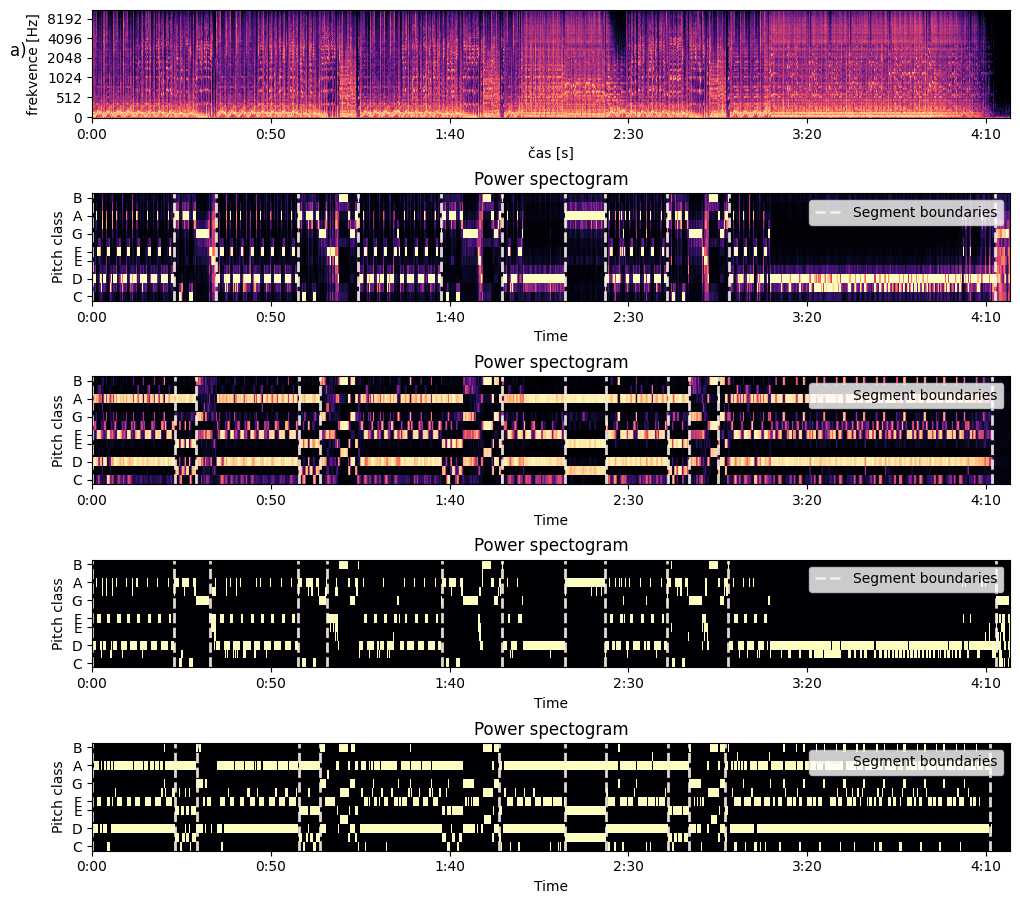

In [16]:
fig, ax = plt.subplots(5,1, figsize=(10,9))
fig.tight_layout()
fig.subplots_adjust(hspace = 0.7)
trans1 = mpt.blended_transform_factory(ax[1].transData, ax[1].transAxes)
trans2 = mpt.blended_transform_factory(ax[2].transData, ax[2].transAxes)
trans3 = mpt.blended_transform_factory(ax[3].transData, ax[3].transAxes)
trans4 = mpt.blended_transform_factory(ax[4].transData, ax[4].transAxes)


hop_length = 512
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
librosa.display.specshow(chroma_deep, y_axis='chroma', x_axis='time', ax=ax[2])
librosa.display.specshow(chroma_binary, y_axis='chroma', x_axis='time', ax=ax[3])
librosa.display.specshow(chroma_deep_binary, y_axis='chroma', x_axis='time', ax=ax[4])

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                        y_axis='mel', x_axis='time', hop_length=hop_length,
                        ax=ax[0])
ax[0].set_title('a)', x=-0.08, y=0.5)
ax[0].set_ylabel("frekvence [Hz]")
ax[0].set_xlabel("čas [s]")

ax[1].vlines(bounds_times, 0, 1, color = 'linen', linestyle = '--', linewidth=2, alpha=0.9, label='Segment boundaries', transform=trans1)
ax[1].legend()
ax[1].set(title = 'Power spectogram')

ax[2].vlines(bounds_deep_times, 0, 1, color = 'linen', linestyle = '--', linewidth=2, alpha=0.9, label='Segment boundaries', transform=trans2)
ax[2].legend()
ax[2].set(title = 'Power spectogram')

ax[3].vlines(bounds_binary_times, 0, 1, color = 'linen', linestyle = '--', linewidth=2, alpha=0.9, label='Segment boundaries', transform=trans3)
ax[3].legend()
ax[3].set(title = 'Power spectogram')

ax[4].vlines(bounds_binary_deep_times, 0, 1, color = 'linen', linestyle = '--', linewidth=2, alpha=0.9, label='Segment boundaries', transform=trans4)
ax[4].legend()
ax[4].set(title = 'Power spectogram')